# LAB 3: LINEAR REGRESSION USING ROBUST FUNCTIONS

## 1. INTRODUCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_sample(angle_deg=45, n_samples=100):
    m = [0.,0.]
    angle = angle_deg * np.pi / 180
    rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    
    lamb = np.array([[n_samples, 0],[0, 1]])
    s = np.dot(rot, np.dot(lamb, rot.transpose()))
    c = np.random.multivariate_normal(m, s, n_samples)
    
    return c

In [3]:
c = generate_sample()
x, y = c[:, 0].ravel(), c[:, 1].ravel()

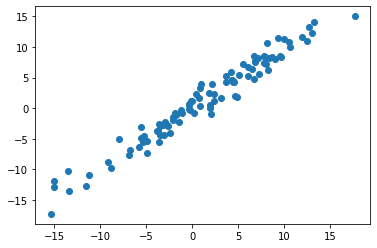

In [4]:
plt.scatter(x, y)

In [5]:
def error(x, y, w):
    return 1 / 2 * np.sum((w[0] * x + w[1] - y) ** 2)

def grad_error(x, y, w):
    return np.array([np.sum((w[0] * x + w[1] - y) * x), np.sum(w[0] * x + w[1] - y)])

In [35]:
def adapting_gradient_descent(x, y, f, grad_f, tol=1e-5, max_iter=250):
    np.random.seed(42)
    w = np.random.uniform(0, 1, (2, ))
    n = 0
    alpha = 1
    
    while np.linalg.norm(grad_f(x, y, w)) >= tol and n < max_iter:
        alpha = 1
        
        while f(x, y, w - alpha * grad_f(x, y, w)) - f(x, y, w) >= 0:
            alpha = alpha / 2
        
        n = n + 1
        w = w - alpha * grad_f(x, y, w)
    
    return w, n

In [7]:
w_opt, n = adapting_gradient_descent(x, y, error, grad_error)
print(w_opt)

[0.96524419 0.13534543]


In [22]:
def plot_fitted_line(x, y, w, title=''):
    plt.clf()
    
    plt.plot(x, w[0] * x + w[1], 'r')
    plt.scatter(x, y)
    
    plt.title(title)
    
    plt.show()

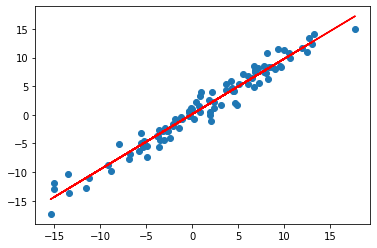

In [9]:
plot_fitted_line(x, y, w_opt)

Adding an outlier

In [10]:
x_noisy = np.copy(x)
y_noisy = np.copy(y)

x_noisy[1] = -40
y_noisy[1] = 20

In [11]:
w_opt, n = adapting_gradient_descent(x_noisy, y_noisy, error, grad_error)
print(w_opt)

[0.59949313 1.0371294 ]


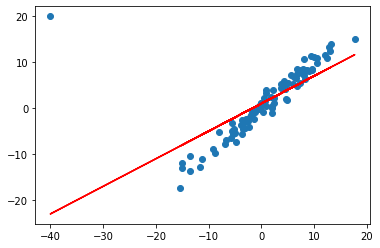

In [12]:
plot_fitted_line(x_noisy, y_noisy, w_opt)

In [37]:
def generate_noisy_sample(x, y, prop=0.1):
    noisy_x = np.copy(x)
    noisy_y = np.copy(y)
    
    num_points = int(x.shape[0] * prop)
    noisy_idx = np.random.choice(x.shape[0], num_points)
    
    noisy_x[noisy_idx] = noisy_x[noisy_idx] * np.random.normal(size=num_points)
    noisy_y[noisy_idx] = noisy_y[noisy_idx] * np.random.normal(size=num_points)
    
    return noisy_x, noisy_y

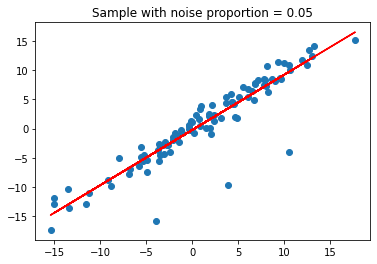

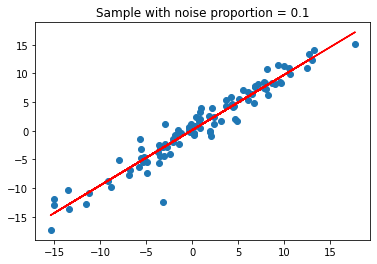

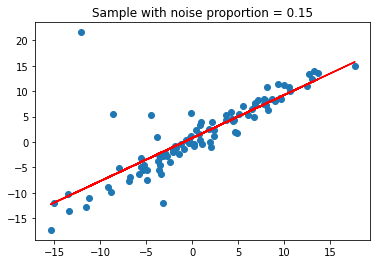

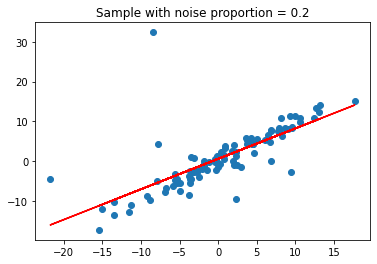

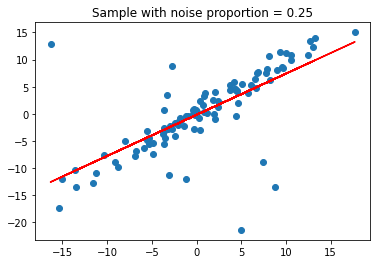

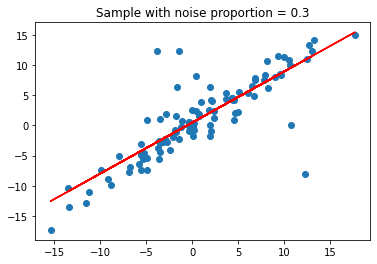

In [38]:
noise_props = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

for prop in noise_props:
    x_noisy, y_noisy = generate_noisy_sample(x, y, prop=prop)
    
    w_opt, n = adapting_gradient_descent(x_noisy, y_noisy, error, grad_error)
    
    plot_fitted_line(x_noisy, y_noisy, w_opt, title=f'Sample with noise proportion = {prop}')

## 2. ROBUST FUNCTIONS

In [14]:
def least_squares_function(u):
    return 0.5 * u**2

def cauchy_function(u, c=1):
    return (c**2 / 2) * np.log(1 + (u / c)**2)

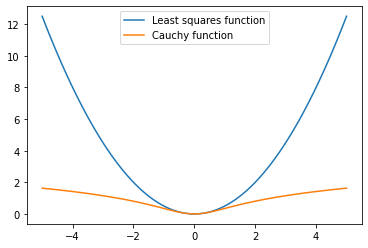

In [15]:
x_values = np.linspace(-5, 5, 100)

plt.clf()

plt.plot(x_values, least_squares_function(x_values), label='Least squares function')
plt.plot(x_values, cauchy_function(x_values), label='Cauchy function')

plt.legend()
plt.show()

In [16]:
def cauchy(x, y, w, c=1):
    return (c**2 / 2) * np.sum(np.log(1 + ((w[0] * x + w[1] - y) / c)**2))


def grad_cauchy(x, y, w, c=1):
    error = w[0] * x + w[1] - y
    error_ratio = (c**2 * error) / (c**2 + error**2)
    
    return np.array([np.sum(x * error_ratio), np.sum(error_ratio)])

def adapting_gradient_descent_cauchy(x, y, c=1, tol=1e-5, max_iter=250):
    np.random.seed(42)
    w = np.random.uniform(0, 1, (2, ))
    n = 0
    path = [w]
    alpha = 1
    
    while np.linalg.norm(grad_cauchy(x, y, w)) >= tol and n < max_iter:
        alpha = 1
        
        while cauchy(x, y, w - alpha * grad_cauchy(x, y, w, c)) - cauchy(x, y, w, c) >= 0:
            alpha = alpha / 2
        
        n = n + 1
        w = w - alpha * grad_cauchy(x, y, w)
        path.append(w)
    
    return w, np.array(path), n

In [17]:
w_opt, path, n_iter = adapting_gradient_descent_cauchy(x, y)

print(w_opt)

[0.98348789 0.15091736]


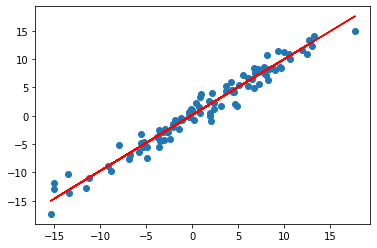

In [18]:
plot_fitted_line(x, y, w_opt)

In [19]:
w_opt, path, n = adapting_gradient_descent_cauchy(x_noisy, y_noisy)
print(w_opt)

[0.98378192 0.16827137]


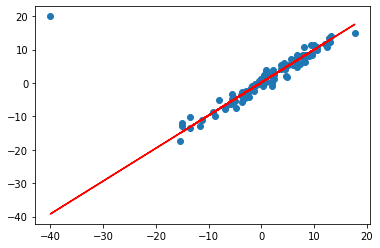

In [20]:
plot_fitted_line(x_noisy, y_noisy, w_opt)